In [ ]:
# Instalanco en anaconda prompt:
conda install -c conda-forge numpy=1.26.4 scipy=1.13.1 rioxarray dask rasterio -y

In [2]:
#!pip install --upgrade pip #Durga
#!pip install --force-reinstall geopandas rasterio rioxarray rasterstats shapely pyproj matplotlib pandas numpy folium #Durga

  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rasterio-1.4.3-cp311-cp311-win_amd64.whl.metadata (9.4 kB)
  Using cached rioxarray-0.19.0-py3-none-any.whl.metadata (5.5 kB)
  Using cached rasterstats-0.20.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached shapely-2.1.2-cp311-cp311-win_amd64.whl.metadata (7.1 kB)
  Using cached pyproj-3.7.2-cp311-cp311-win_amd64.whl.metadata (31 kB)
  Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.4-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached pyogrio-0.11.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2025.10.

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'c:\\users\\dell\\anaconda3\\envs\\tarea3python311\\lib\\site-packages\\pyproj\\database.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [23]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for numpy<2.3.0,>=1.21.0 from https://files.pythonhosted.org/packages/31/0a/f354fb7176b81747d870f7991dc763e157a934c717b67b58456bc63da3df/numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for geopandas<1.0.0,>=0.12.0 from https://files.pythonhosted.org/packages/3e/b0/69fa7a0f55122847506a42fea6988d03b34136938082f142151bc9d9f7e7/geopandas-0.14.4-py3-none-any.whl.metadata
  Obtaining dependency information for rasterio<1.4.0,>=1.3.0 from https://files.pythonhosted.org/packages/a0/28/ed59f8b361122c91273f2545c50636441927b257e02fbd32f7953987017a/rasterio-1.3.11-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency info

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement geowombat==2.1.22 (from versions: none)
ERROR: No matching distribution found for geowombat==2.1.22


In [24]:
import geopandas as gpd
import rioxarray
import rasterio
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [4]:
# Opcional:
#!pip install -U numpy
#!pip install -U rasterio rioxarray geopandas

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/7e/1f/56462740694de764fde264051224fcbf800dad43cac92a66753153128866/rasterio-1.4.3-cp311-cp311-win_amd64.whl.metadata
  Using cached rasterio-1.4.3-cp311-cp311-win_amd64.whl.metadata (9.4 kB)
  Obtaining dependency information for rioxarray from https://files.pythonhosted.org/packages/2a/2f/63d2cacc0e525f8e3398bcf32bd3620385f22cd1600834ec49d7f3597a7b/rioxarray-0.19.0-py3-none-any.whl.metadata
  Using cached rioxarray-0.19.0-py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for xarray>=2024.7.0 from https://files.pythonhosted.org/packages/c3/78/4d6d68555a92cb97b4c192759c4ab585c5cb23490f64d4ddf12c66a3b051/xarray-2025.10.1-py3-none-any.whl.metadata
  Using cached xarray-2025.10.1-py3-none-any.whl.metadata (12 kB)
Using cached rasterio-1.4.3-cp311-cp311-win_amd64.whl (25.5 MB)
Using cached rioxarray-0.1

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [25]:
# Upload shape file at district level

maps = gpd.read_file(r'_data/shape_file/DISTRITOS.shp')
# Muestra las primeras 5 filas de tu tabla
maps.head()


,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


<Axes: >

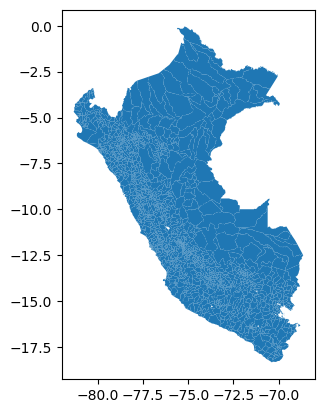

In [26]:
# Dibuja un mapa básico de los distritos
maps.plot()

In [27]:
maps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
maps.columns

Index(['IDDPTO', 'DEPARTAMEN', 'IDPROV', 'PROVINCIA', 'IDDIST', 'DISTRITO',
       'CAPITAL', 'CODCCPP', 'AREA', 'FUENTE', 'geometry'],
      dtype='object')

In [29]:
# Asegura que todas las columnas estén en mayúsculas 
maps.columns = maps.columns.str.upper()

# Limpieza de acentos y estandarización del nombre del distrito
maps['DISTRITO'] = (
    maps['DISTRITO']
    .str.normalize('NFKD')
    .str.encode('ascii', errors='ignore')
    .str.decode('utf-8')
    .str.upper()
)

# Verifica los primeros valores
maps.head()


,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,GEOMETRY
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


In [30]:
import geopandas as gpd
import pandas as pd
import numpy as np


In [20]:
# Opcional:
#!pip install --upgrade --force-reinstall numpy scipy rioxarray dask rasterio #Daniel

Defaulting to user installation because normal site-packages is not writeable

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\Lenovo\\AppData\\Roaming\\Python\\Python311\\site-packages\\~umpy.libs\\libscipy_openblas64_-860d95b1c38e637ce4509f5fa24fbf2a.dll'
Check the permissions.




  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/7d/10/f8850982021cb90e2ec31990291f9e830ce7d94eef432b15066e7cbe0bec/numpy-2.3.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.3.4-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/d6/73/c449a7d56ba6e6f874183759f8483cde21f900a8be117d67ffbb670c2958/scipy-1.16.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for rioxarray from https://files.pythonhosted.org/packages/2a/2f/63d2cacc0e525f8e3398bcf32bd3620385f22cd1600834ec49d7f3597a7b/rioxarray-0.19.0-py3-none-any.whl.metadata
  Using cached rioxarray-0.19.0-py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for dask from https://files.pythonhosted.org/packages/a4/2b/36

In [31]:
import rioxarray
from rasterstats import zonal_stats

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [32]:
# Carga el raster Tmin
tmin_raster = rioxarray.open_rasterio("tmin_raster.tif")

# Si es multibanda (por ejemplo, una banda por año o mes)
print(tmin_raster)


NameError: name 'rioxarray' is not defined

In [33]:
import os
os.makedirs("../data", exist_ok=True)


# 3.2 — Zonal statistics

In [34]:
import geopandas as gpd
import pandas as pd
from rasterstats import zonal_stats
import rioxarray

maps = maps.set_geometry("GEOMETRY")


# Asegura que ambos CRS coincidan
if maps.crs != tmin_raster.rio.crs:
    maps = maps.to_crs(tmin_raster.rio.crs)

# --- Cálculo por banda ---
results = []

for i in range(1, len(tmin_raster.band) + 1):  # bandas 1 a 5
    print(f"Procesando banda {i}...")
    
    # Guarda temporalmente la banda i
    temp_file = f"../data/temp_band_{i}.tif"
    # Espeficiar no data
    tmin_raster.sel(band=i).rio.to_raster(temp_file, nodata=-9999999999999999)    
    # Calcula estadísticas para esa banda
    stats = zonal_stats(
        vectors=maps,
        raster=temp_file,
        stats=["count", "mean", "min", "max", "std", "percentile_10", "percentile_90"],
        geojson_out=False
    )
    
    # Convierte a DataFrame y añade la etiqueta de banda
    df_band = pd.DataFrame(stats)
    df_band["banda"] = i
    df_band["UBIGEO"] = maps["IDDIST"]
    df_band["DISTRITO"] = maps["DISTRITO"]
    df_band["PROVINCIA"] = maps["PROVINCIA"]
    df_band["DEPARTAMEN"] = maps["DEPARTAMEN"]
    
    results.append(df_band)

# --- Combina todo ---
zonal_df = pd.concat(results, ignore_index=True)

# Calcula un rango térmico intra-distrital: Métrica personalizada
zonal_df["range_temp"] = zonal_df["max"] - zonal_df["min"]

# Guarda los resultados
zonal_df.to_csv("../data/zonal_tmin_bandas.csv", index=False)

print("✅ Listo: estadísticas zonales por distrito y por banda calculadas.")
zonal_df.head()


ModuleNotFoundError: No module named 'rasterstats'

In [35]:
tmin_raster.mean().values
# Data is in actual °C

NameError: name 'tmin_raster' is not defined

# 3.3 — Analysis & Visualizations

In [44]:
import pandas as pd

zonal_df = pd.read_csv("../data/zonal_tmin_bandas.csv", dtype={"UBIGEO": str})

zonal_df.head()


,min,max,mean,count,std,percentile_10,percentile_90,banda,UBIGEO,DISTRITO,PROVINCIA,DEPARTAMEN,range_temp
0,8.903979,22.604116,18.932154,107,3.430219,13.836891,22.358988,1,100902,CODO DEL POZUZO,PUERTO INCA,HUANUCO,13.700137
1,19.775057,22.860834,22.290649,57,0.464426,21.992695,22.676195,1,100904,TOURNAVISTA,PUERTO INCA,HUANUCO,3.085777
2,21.953405,22.141968,22.056366,6,0.076649,21.955791,22.137794,1,250305,ALEXANDER VON HUMBOLDT,PADRE ABAD,UCAYALI,0.188562
3,21.661476,22.481043,22.263211,62,0.158932,22.042723,22.416752,1,250302,IRAZOLA,PADRE ABAD,UCAYALI,0.819567
4,21.975763,22.385101,22.173068,22,0.118299,22.023388,22.361992,1,250304,NESHUYA,PADRE ABAD,UCAYALI,0.409338


In [45]:
zonal_df["mean"].describe()


count    8945.000000
mean        9.453099
std         6.880738
min        -5.989168
25%         3.941030
50%         8.444639
75%        15.180823
max        23.294387
Name: mean, dtype: float64

In [46]:
zonal_mean = (
    zonal_df.groupby(["UBIGEO", "DISTRITO", "PROVINCIA", "DEPARTAMEN"])
    .agg({"mean": "mean", "min": "mean", "max": "mean"})
    .reset_index()
)


In [47]:
zonal_mean

,UBIGEO,DISTRITO,PROVINCIA,DEPARTAMEN,mean,min,max
0,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,12.403868,11.032648,13.120787
1,010102,ASUNCION,CHACHAPOYAS,AMAZONAS,10.232676,10.029134,10.436218
2,010103,BALSAS,CHACHAPOYAS,AMAZONAS,14.492733,9.164226,18.931234
3,010104,CHETO,CHACHAPOYAS,AMAZONAS,11.770264,11.627967,11.850517
4,010105,CHILIQUIN,CHACHAPOYAS,AMAZONAS,11.065167,9.423780,12.711129
...,...,...,...,...,...,...,...
1868,250302,IRAZOLA,PADRE ABAD,UCAYALI,22.097315,21.486948,22.322860
1869,250303,CURIMANA,PADRE ABAD,UCAYALI,22.027528,21.757619,22.194360
1870,250304,NESHUYA,PADRE ABAD,UCAYALI,21.937903,21.727421,22.180375
1871,250305,ALEXANDER VON HUMBOLDT,PADRE ABAD,UCAYALI,21.862907,21.730026,21.946946


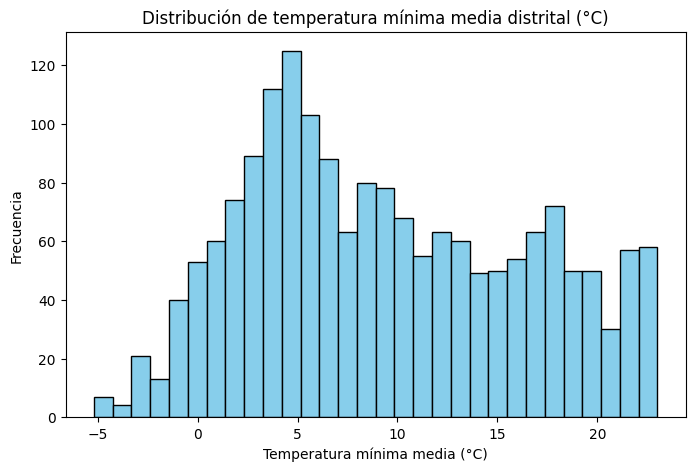

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(zonal_mean["mean"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribución de temperatura mínima media distrital (°C)")
plt.xlabel("Temperatura mínima media (°C)")
plt.ylabel("Frecuencia")
plt.show()


In [51]:
top15 = zonal_mean.nlargest(15, "mean")
bottom15 = zonal_mean.nsmallest(15, "mean")

print("Distritos más cálidos:")
display(top15[["DISTRITO", "mean"]])
print("\nDistritos más fríos:")
display(bottom15[["DISTRITO", "mean"]])


Distritos más cálidos:


,DISTRITO,mean
1496,MORONA,23.008980
1502,YAGUAS,23.005028
1472,RAMON CASTILLA,22.972547
1475,SAN PABLO,22.934505
1497,PASTAZA,22.919820
1473,PEBAS,22.878973
1454,LAS AMAZONAS,22.814834
1450,IQUITOS,22.780908
1499,PUTUMAYO,22.779239
1453,INDIANA,22.761415



Distritos más fríos:


,DISTRITO,mean
1676,CAPAZO,-5.191071
1840,SUSAPAYA,-5.157803
1835,TARATA,-4.995736
1678,SANTA ROSA,-4.861880
1842,TICACO,-4.417395
411,SAN ANTONIO DE CHUCA,-4.390306
1826,CANDARAVE,-4.359307
753,CONDOROMA,-4.122947
1694,PARATIA,-4.094575
1515,CARUMAS,-3.411975


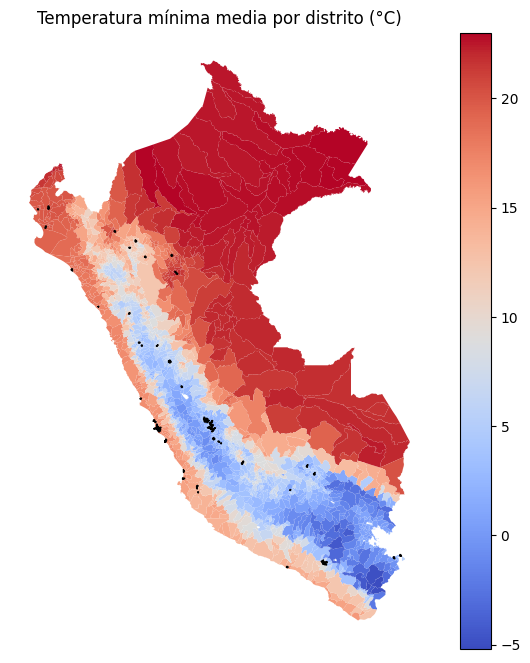

✅ PNG map saved to '../outputs/choropleth_distritos.png'
✅ CSV table saved to '../outputs/distritos_temperatura.csv'


In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1 Cargar el shapefile
maps = gpd.read_file("_data/shape_file/DISTRITOS.shp")

if "UBIGEO" not in maps.columns and "IDDIST" in maps.columns:
    maps["UBIGEO"] = maps["IDDIST"]
# 2️ Estandarizar nombres de columnas (por si acaso)
maps.columns = maps.columns.str.upper()


# 2.5 Estandarizar nombres de distritos

maps['DISTRITO'] = (
    maps['DISTRITO']
    .str.normalize('NFKD')
    .str.encode('ascii', errors='ignore')
    .str.decode('utf-8')
    .str.strip()
    .str.upper()
)


# 3️ Verificar nombre de columna geográfica y activarla
if "GEOMETRY" in maps.columns:
    maps = maps.set_geometry("GEOMETRY")

# 4️ Definir CRS si no está
if maps.crs is None:
    maps.set_crs("EPSG:4326", inplace=True)

# 5️ Hacer el merge con tus datos zonales (usa la media o el df que quieras)
maps["UBIGEO"] = maps["UBIGEO"].astype(str)
zonal_mean["UBIGEO"] = zonal_mean["UBIGEO"].astype(str)
map_merge = maps.merge(zonal_mean, on="UBIGEO", how="left")
map_merge = map_merge.rename(columns={
    "DISTRITO_x": "DISTRITO",
    "PROVINCIA_x": "PROVINCIA",
    "DEPARTAMEN_x": "DEPARTAMEN"
}).drop(columns=["DISTRITO_y", "PROVINCIA_y", "DEPARTAMEN_y"], errors="ignore")
# 6️ Asegurar que conserve geometría y CRS después del merge
map_merge = gpd.GeoDataFrame(map_merge, geometry="GEOMETRY", crs=maps.crs)

# Coropletas con datos perdidos
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Temperatura
map_merge[map_merge["mean"].notna()].plot(
    column="mean",
    cmap="coolwarm",
    legend=True,
    ax=ax
)

# Overlay districts with missing data in gray
map_merge[map_merge["mean"].isna()].plot(
    color="lightgray",
    edgecolor="black",
    ax=ax
)

plt.title("Temperatura mínima media por distrito (°C)")
plt.axis("off")
plt.show()

#Carpeta
os.makedirs("../outputs", exist_ok=True)

# Guardamos el mapa
fig.savefig("../outputs/choropleth_distritos.png", dpi=300, bbox_inches='tight')
plt.close(fig)  # Close the figure to free memory


# Guardamas la tabla como CSV
map_merge.drop(columns="GEOMETRY").to_csv("../outputs/distritos_temperatura.csv", index=False)

print("✅ PNG map saved to '../outputs/choropleth_distritos.png'")
print("✅ CSV table saved to '../outputs/distritos_temperatura.csv'")

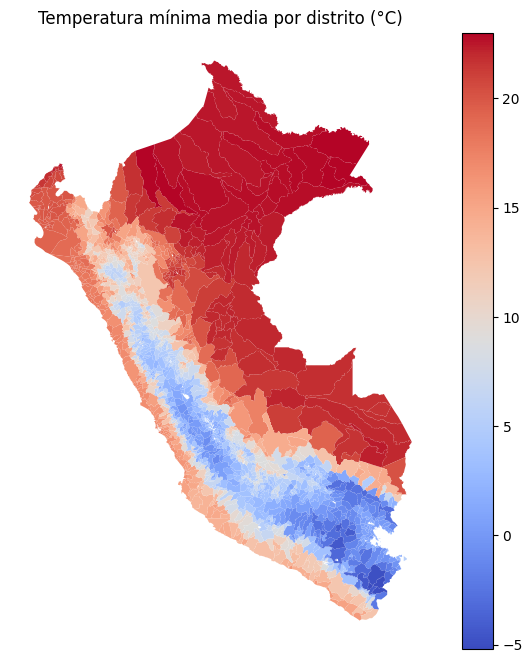

In [55]:
# 7️ Graficar
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
map_merge.plot(column="mean", cmap="coolwarm", legend=True, ax=ax)
plt.title("Temperatura mínima media por distrito (°C)")
plt.axis("off")
plt.show()

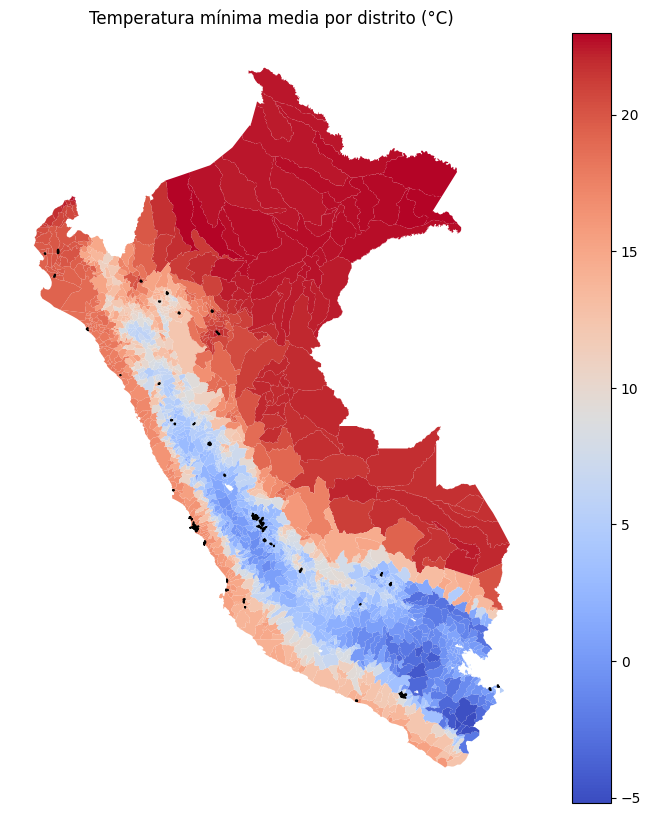

In [56]:
# --- Choropleth with gray for missing data ---
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot districts with temperature data
map_merge[map_merge["mean"].notna()].plot(
    column="mean",
    cmap="coolwarm",
    legend=True,
    ax=ax
)

# Overlay districts with missing data in gray
map_merge[map_merge["mean"].isna()].plot(
    color="lightgray",
    edgecolor="black",
    ax=ax
)

plt.title("Temperatura mínima media por distrito (°C)")
plt.axis("off")
plt.show()


In [113]:
print("maps:", len(maps))
print("zonal_mean:", len(zonal_mean))

maps: 1873
zonal_mean: 1873
